In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Datasets/data_science_job.csv')

In [3]:
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0


In [4]:
df.shape

(19158, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [6]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [7]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [8]:
df['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [9]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [10]:
df['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [11]:
df['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [12]:
df['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [13]:
df['experience'].value_counts()

20.0    3434
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
1.0      549
0.0      522
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
Name: experience, dtype: int64

In [14]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [15]:
#training_hours ,city_development_index, enrolled_level, education_level, experience

cols= [var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]

In [16]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [17]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
5249,0.920,no_enrollment,Graduate,20.0,102.0
1751,0.827,Full time course,Masters,7.0,92.0
10972,0.766,Part time course,High School,4.0,7.0
2770,0.923,no_enrollment,Graduate,5.0,15.0
2004,0.624,no_enrollment,Graduate,7.0,12.0


In [18]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [19]:
new_df=df[cols].dropna()

In [20]:
df.shape, new_df.shape

((19158, 13), (17182, 5))

array([[<AxesSubplot:title={'center':'city_development_index'}>,
        <AxesSubplot:title={'center':'experience'}>],
       [<AxesSubplot:title={'center':'training_hours'}>, <AxesSubplot:>]],
      dtype=object)

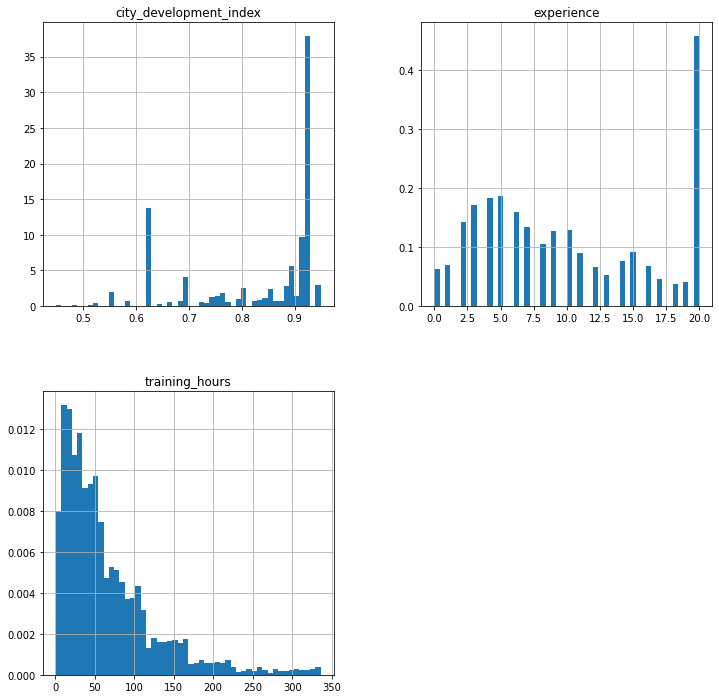

In [24]:

new_df.hist(bins=50, density = True,figsize=(12,12))

# plt.subplot(122)
# stats.probplot(X_train['Age'],dist='norm', plot=plt)
# plt.title('Age QQ plot')

<AxesSubplot:>

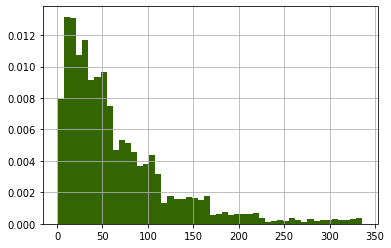

In [27]:
fig = plt.figure()
ax=fig.add_subplot(111)

df['training_hours'].hist(bins=50, ax=ax, density= True, color='red')

#daat after cca, the argument alpha makes the color transparent, so we can see
#the overlay of 2 distributions
df['training_hours'].hist(bins=50, ax=ax, density= True, color='green', alpha =0.8)

<AxesSubplot:ylabel='Density'>

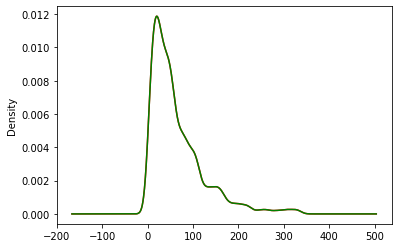

In [28]:
fig = plt.figure()
ax=fig.add_subplot(111)

df['training_hours'].plot.density(color='red')

#daat after cca, the argument alpha makes the color transparent, so we can see
#the overlay of 2 distributions
df['training_hours'].plot.density(color='green')

<AxesSubplot:ylabel='Density'>

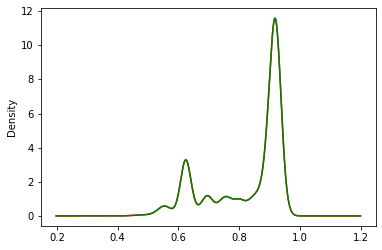

In [29]:
fig = plt.figure()
ax=fig.add_subplot(111)

df['city_development_index'].plot.density(color='red')

#daat after cca, the argument alpha makes the color transparent, so we can see
#the overlay of 2 distributions
df['city_development_index'].plot.density(color='green')

In [31]:
temp= pd.concat([
    df['enrolled_university'].value_counts()/len(df),
    
    new_df['enrolled_university'].value_counts()/len(new_df)
],axis=1)

In [32]:
temp.columns=['original', 'cca']
temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [33]:
temp= pd.concat([
    df['education_level'].value_counts()/len(df),
    
    new_df['education_level'].value_counts()/len(new_df)
],axis=1)

In [34]:
temp.columns=['original', 'cca']
temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


In [35]:
#first we have to check missing random value stataement full filling ya nahi